In [1]:
import numpy as np 
import math
import matplotlib.pyplot as plt 

import I_functions_class as Inp
from astropy.io import fits
import module1 as m1

import scipy 

from scipy.fft import fft, ifft
from scipy.fft import fftfreq

In [2]:
mu = 9.0968024e-24  
nu = 1.#in grams 
lam = 1.
GC = 1.
M = 1.e21
c = 1.
tol = 1.e-10

r_initial = 2000.*M
r_final= -70.*M

T = 1/(8*np.pi*M)
k = -10.
h = np.linspace(.01*T,20.*T,2000)


In [3]:
pauli_1 = [[0,1],[1,0]]
pauli_2 = [[0,complex(0,-1)],[complex(0,1),0]]
pauli_3 = [[1,0],[0,-1]]
Beta = np.array([[1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,-1]])

In [4]:
gamma1 = np.array([[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])
gamma2 = np.array([[0,0,0,complex(0,-1)],[0,0,complex(0,1),0],[0,complex(0,-1),0,0],[complex(0,1),0,0,0]])
gamma3 = np.array([[0,0,1.,0],[0,0,0,-1.],[1.,0,0,0],[0,-1.,0,0]])

In [5]:
epsilon_x = .1
epsilon_y = .1
epsilon_z = .1

In [ ]:
nx,ny,nz = 21, 21, 21
dx = epsilon_x
dy = epsilon_y
dz = epsilon_z

kx = np.linspace(-np.pi/dx,np.pi/dx, num=nx, axis=0)
ky = np.linspace(-np.pi/dy,np.pi/dy, num=ny, axis=0)
kz = np.linspace(-np.pi/dz,np.pi/dz, num=nz, axis=0)
W_k_flat = np.zeros((nx,ny,nz,4,4),dtype = complex)
W_k_flat_no_wilson = np.zeros((nx,ny,nz,4,4),dtype = complex)

for x in range(nx):
    for y in range(ny):
        for z in range(nz):
           W_k_flat[x,y,z,:,:] = Beta*((mu + 1/epsilon_x + 1/epsilon_y + 1/epsilon_z) + (gamma1-2)*np.exp(complex(0,kx[x]*epsilon_x))/(2*epsilon_x)+ (gamma2-2)*np.exp(complex(0,ky[y]*epsilon_y))/(2*epsilon_y)+ (gamma3-2)*np.exp(complex(0,kz[z]*epsilon_z))/(2*epsilon_z) - (gamma1+2)*np.exp(complex(0,-kx[x]*epsilon_x))/(2*epsilon_x)- (gamma2+2)*np.exp(complex(0,-ky[y]*epsilon_y))/(2*epsilon_y)- (gamma3+2)*np.exp(complex(0,-kz[z]*epsilon_z))/(2*epsilon_z))
           W_k_flat_no_wilson[x,y,z,:,:] = Beta*((mu) + (gamma1)*np.exp(complex(0,kx[x]*epsilon_x))/(2*epsilon_x)+ (gamma2)*np.exp(complex(0,ky[y]*epsilon_y))/(2*epsilon_y)+ (gamma3)*np.exp(complex(0,kz[z]*epsilon_z))/(2*epsilon_z) - (gamma1)*np.exp(complex(0,-kx[x]*epsilon_x))/(2*epsilon_x)- (gamma2)*np.exp(complex(0,-ky[y]*epsilon_y))/(2*epsilon_y)- (gamma3)*np.exp(complex(0,-kz[z]*epsilon_z))/(2*epsilon_z))
  



In [ ]:
np.array(W_k_flat[1,2,0,:,:])

In [ ]:
plt.plot(kx,np.abs(W_k_flat[:,11,11,0,0]))
plt.plot(kx,np.abs(W_k_flat[:,11,11,1,1]))
plt.plot(kx,np.abs(W_k_flat[:,11,11,2,2]))
plt.plot(kx,np.abs(W_k_flat[:,11,11,3,3]))

In [ ]:
plt.plot(kx,np.real(W_k_flat[:,11,11,0,0]))
plt.plot(kx,np.real(W_k_flat[:,11,11,1,1]))
plt.plot(kx,np.real(W_k_flat[:,11,11,2,2]))
plt.plot(kx,np.real(W_k_flat[:,11,11,3,3]))

In [ ]:
plt.plot(kx,np.imag(W_k_flat[:,11,11,0,0]))
plt.plot(kx,np.imag(W_k_flat[:,11,11,1,1]))
plt.plot(kx,np.imag(W_k_flat[:,11,11,2,2]))
plt.plot(kx,np.imag(W_k_flat[:,11,11,3,3]))

In [ ]:
plt.plot(kx,np.abs(W_k_flat_no_wilson[:,11,11,0,0]))
plt.plot(kx,np.abs(W_k_flat_no_wilson[:,11,11,1,1]))
plt.plot(kx,np.abs(W_k_flat_no_wilson[:,11,11,2,2]))
plt.plot(kx,np.abs(W_k_flat_no_wilson[:,11,11,3,3]))

In [ ]:
plt.plot(kx,np.real(W_k_flat_no_wilson[:,11,11,0,0]))
plt.plot(kx,np.real(W_k_flat_no_wilson[:,11,11,1,1]))
plt.plot(kx,np.real(W_k_flat_no_wilson[:,11,11,2,2]))
plt.plot(kx,np.real(W_k_flat_no_wilson[:,11,11,3,3]))

In [ ]:
plt.plot(kx,np.imag(W_k_flat_no_wilson[:,11,11,0,0]))
plt.plot(kx,np.imag(W_k_flat_no_wilson[:,11,11,1,1]))
plt.plot(kx,np.imag(W_k_flat_no_wilson[:,11,11,2,2]))
plt.plot(kx,np.imag(W_k_flat_no_wilson[:,11,11,3,3]))

In [14]:
#think about diag slices in this format

In [47]:
nr,ntheta,nphi = 51, 51, 51
theta_points_mercator = np.linspace(0.00001,np.pi,ntheta)

theta_points = np.arctan(np.sinh(theta_points_mercator))

#k_thetas = 2*np.pi/theta_points


$H_{\rm Dirac} = \int dr_\star\, d\theta \,d\phi \,\overline{\xi}(x) \Bigl[ \tilde{\boldsymbol\gamma}^1 \partial_{r_{\star}} + \tilde{\boldsymbol\gamma}^2\frac{e^{\nu/2}}{r} \partial_\theta + \tilde{\boldsymbol\gamma}^3\frac{e^{\nu/2}}{r \sin\theta} \partial_\phi + \mu e^{\nu/2} \Bigr] \xi(x).$

In [54]:
r_points = np.linspace(20*M,200*M,nr) #in rstar 
tol =1.e-10
rs =  np.array([m1.r_star_to_r(x,M,tol) for x in r_points])

#krs = 2*np.pi/rs
#the tilde versions of gamma are the same as the flat spacetime, so all this is kinda wrong. 
#still have some geometric pieces but the derivative bits itself is pretty straightforward 

W_k_curved = np.zeros((nr,ntheta,nphi,4,4),dtype = complex)
W_k_curved_no_wilson = np.zeros((nr,ntheta,nphi,4,4),dtype = complex)
#W_k_curved_no_wilson has indices of [kr,ktheta,kphi,dirac a, diracb]


#below FT in phi as well 
phis = np.linspace(0.0000001,2*np.pi,nphi)
k_phis = 2*np.pi/phis
total_delta_phi = 2*(phis[1]-phis[0])


for r in range(1,nr-1):
    #print(r)
    e_nuover2 = np.sqrt(1-2*M/rs[r])
    
    delta_r_plus = rs[r+1]-rs[r]
    delta_r_minus = rs[r]-rs[r-1]
    total_delta_r = delta_r_plus+delta_r_minus
    for theta in range(1,ntheta-1):
        epsilon_theta_plus = (theta_points_mercator[theta+1]-theta_points_mercator[theta])
        epsilon_theta_minus = (theta_points_mercator[theta]-theta_points_mercator[theta-1])
        total_delta_theta = epsilon_theta_plus+epsilon_theta_minus
        
        for m in range(len(phis)):
            #for kr in range(len(krs)):
               # for ktheta in range(len(k_thetas)):
 
            #W_k_curved_no_wilson[r,theta,kphi,:,:] += Beta*e_nuover2*(mu+(gamma1)*np.exp(complex(0,krs[kr]*delta_r_plus))/(total_delta_r* e_nuover2)+ (gamma2)*np.exp(complex(0,k_thetas[ktheta]*epsilon_theta_plus))/(total_delta_theta*rs[r])+(gamma3)*np.exp(complex(0,k_phis[kphi]*epsilon_phi_plus))/(total_delta_phi*rs[r]*np.sin(theta_points[theta])) -  (gamma1)*np.exp(complex(0,-krs[kr]*delta_r_minus))/(total_delta_r* e_nuover2)- (gamma2)*np.exp(complex(0,k_thetas[ktheta]*epsilon_theta_minus))/(total_delta_theta*rs[r])- (gamma3)*np.exp(complex(0,-k_phis[kphi]*epsilon_phi_minus))/(total_delta_phi*rs[r]*np.sin(theta_points[theta])))
            W_k_curved_no_wilson[r,theta,m,:,:] = Beta*e_nuover2*(mu+(gamma3)*np.exp(complex(0,2*np.pi*m/nphi))/(total_delta_phi*rs[r]*np.sin(theta_points[theta]))- (gamma3)*np.exp(complex(0,-2*np.pi*m/nphi))/(total_delta_phi*rs[r]*np.sin(theta_points[theta])))
            W_k_curved_no_wilson[r+1,theta,m,::] = Beta*gamma1/(total_delta_r)
            W_k_curved_no_wilson[r-1,theta,m,::] = -Beta*gamma1/(total_delta_r)
            W_k_curved_no_wilson[r,theta+1,m,::] = Beta*e_nuover2*gamma2/(total_delta_theta*rs[r])
            W_k_curved_no_wilson[r,theta-1,m,::] = -Beta*e_nuover2*gamma2/(total_delta_theta*rs[r])
       
            #W_k_curved_wilson_only[r,theta,m,:,:] = Beta*e_nuover2
    

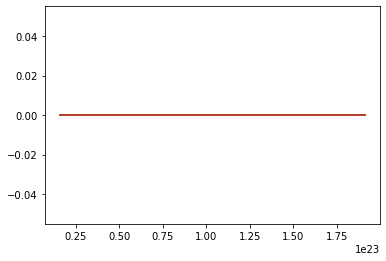

In [55]:
plt.plot(rs,np.abs(W_k_curved_no_wilson[:,24,11,0,0]))
plt.plot(rs,np.abs(W_k_curved_no_wilson[:,24,11,1,1]))
plt.plot(rs,np.abs(W_k_curved_no_wilson[:,24,11,2,2]))
plt.plot(rs,np.abs(W_k_curved_no_wilson[:,24,11,3,3]))
#plt.yscale('log')
plt.show()